
<h1 style="color:Teal; font-size: 36px;">TITANIC PROJECT</h1>


<div>
    <h2 style="color:Teal; display: inline;">Name:</h2>
    <h2 style="color:black; display: inline;">Gizem Ozyildirim</h2>
</div>


### <span style="text-decoration: font-size: larger;">Data Analysis/ Classification</span>

# Type all columns names and info here:

#### 1. PassengerId : 

Passenger number.



#### 2. Survived :

0 = Not-survived,

1 = Survived.


#### 3. Pclass : 

1 = First class, 2 = Second class, 3 = Third class.


#### 4. Name: 

Name of passenger.


#### 5. Sex: 

Gender of passenger.


#### 6. Age : 

Age of passenger.


#### 7. SibSp : 

Number of siblings/ spouses.


#### 8. Parch :

number of parents or children of a passenger on the Titanic.


#### 9. Ticket: 

Document for travel.


#### 10. Fare:

Fee for travel.


#### 11. Cabin: 

Contains a list of cabin IDs


#### 12. Embarked: 

Embarked implies where the traveler mounted from. 

Embark. Southampton, Cherbourg, and Queenstown.

More than 70% of the people boarded from Southampton. 
Just under 20% boarded from Cherbourg.
The rest boarded from Queenstown.
 


---
### Part 0
### a. Importing Libraries

In [1]:
# Import necessary modules.

import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix# Make predictions


### b. Gathering, preparing and observing  the data:

The input file is titanic.csv ([source](https://www.kaggle.com/datasets/hesh97/titanicdataset-traincsv?resource=download))

_Read data from the `titanic.csv` file into a DataFrame__.<br>
 __print the DataFrame__.

In [2]:
# Read csv the file and check the data size (rows & columns).

df = pd.read_csv('titanic.csv')

# Print the row and column size.

print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print()

df.shape

Number of rows: 891
Number of columns: 12



(891, 12)

In [3]:
# Checking the data before starting to work on it.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Print the first 5 rows of the DataFrame.

print("The first 5 rows of the DataFrame:")
print()
df.head()

The first 5 rows of the DataFrame:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# columns
df.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [6]:
# Display unique values in the 'Embarked' column
unique_embarked_values = df['Embarked'].unique()
print("Unique values in the 'Embarked' column:", unique_embarked_values)


Unique values in the 'Embarked' column: ['S' 'C' 'Q' nan]


In [7]:
# Display unique values in the 'Embarked' column
unique_age_values = df['Age'].unique()
print("Unique values in the 'Age' column:\n", unique_age_values)


Unique values in the 'Age' column:
 [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


Histogram plots of the titanic data:


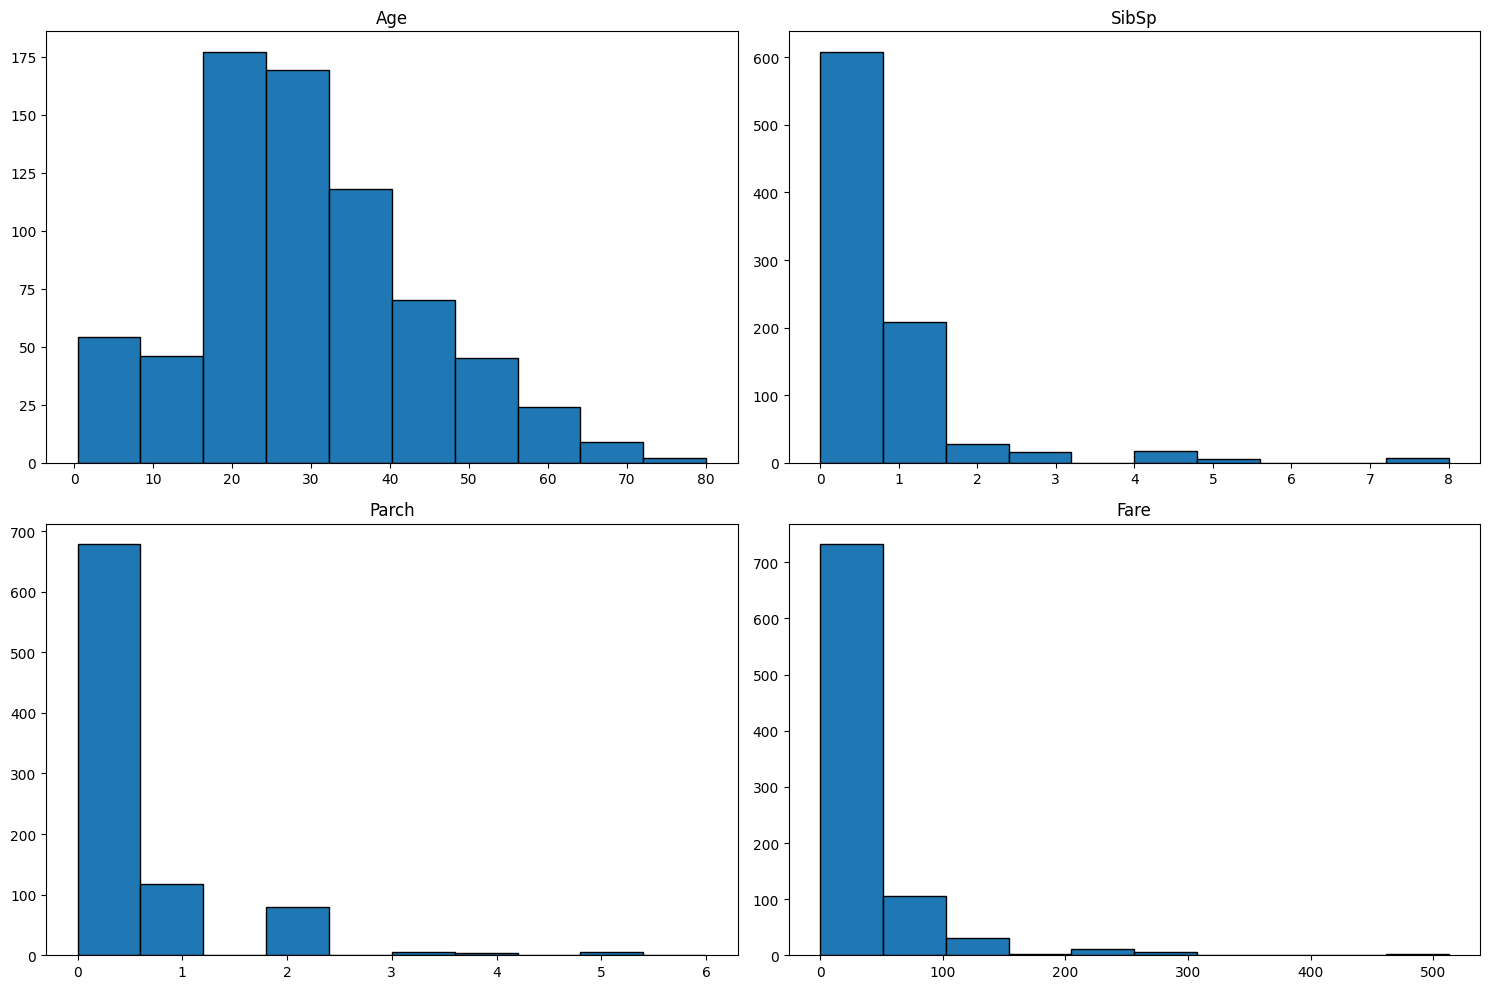

In [8]:
# Histogram (distributions) for all numeric variables 

df_num = df[['Age','SibSp','Parch','Fare']]

print("Histogram plots of the titanic data:")

n_cols = 2

plt.figure(figsize=(15, 10))

# ncols: Number of columns in the subplot grid.
# index: The position of the current plot in the grid (1-based index).
# idx + 1:
# idx is the index of the current iteration in the loop, starting from 0.
# idx + 1 converts it to a 1-based index, as required by plt.subplot.

for idx, col in enumerate(df_num.columns):
    plt.subplot((len(df_num.columns) + n_cols - 1) // n_cols, n_cols, idx + 1)
    plt.hist(df_num[col], edgecolor='black')
    plt.title(col)

plt.tight_layout()
plt.show()


## ANALYSIS OF HISTOGRAM PLOTS 


### Graph 1 (Age):

Most passengers were between 20 and 40 years old, with the highest number around 20-30 years old.
There were fewer older passengers, with numbers dropping off after age 50.

### Graph 2 (SibSp - Number of Siblings/Spouses aboard):

Most passengers did not have any siblings or spouses with them, shown by the high bar at 0.
Fewer passengers had 1 sibling/spouse, and even fewer had more than 2.

### Graph 3 (Parch - Number of Parents/Children aboard):

Most passengers did not have parents or children with them, with the highest bar at 0.
A small number of passengers had 1 or 2 parents/children, and very few had more than that.

### Graph 4 (Fare):

Most passengers paid lower fares, with many paying between 0 and 50.
A few passengers paid much higher fares, shown by the long tail going past 100.


## Conclusion

The histograms show that most Titanic passengers were young adults, traveling alone or with one companion, and paid relatively low fares. This data helps us understand who the passengers were and can be useful for further analysis.




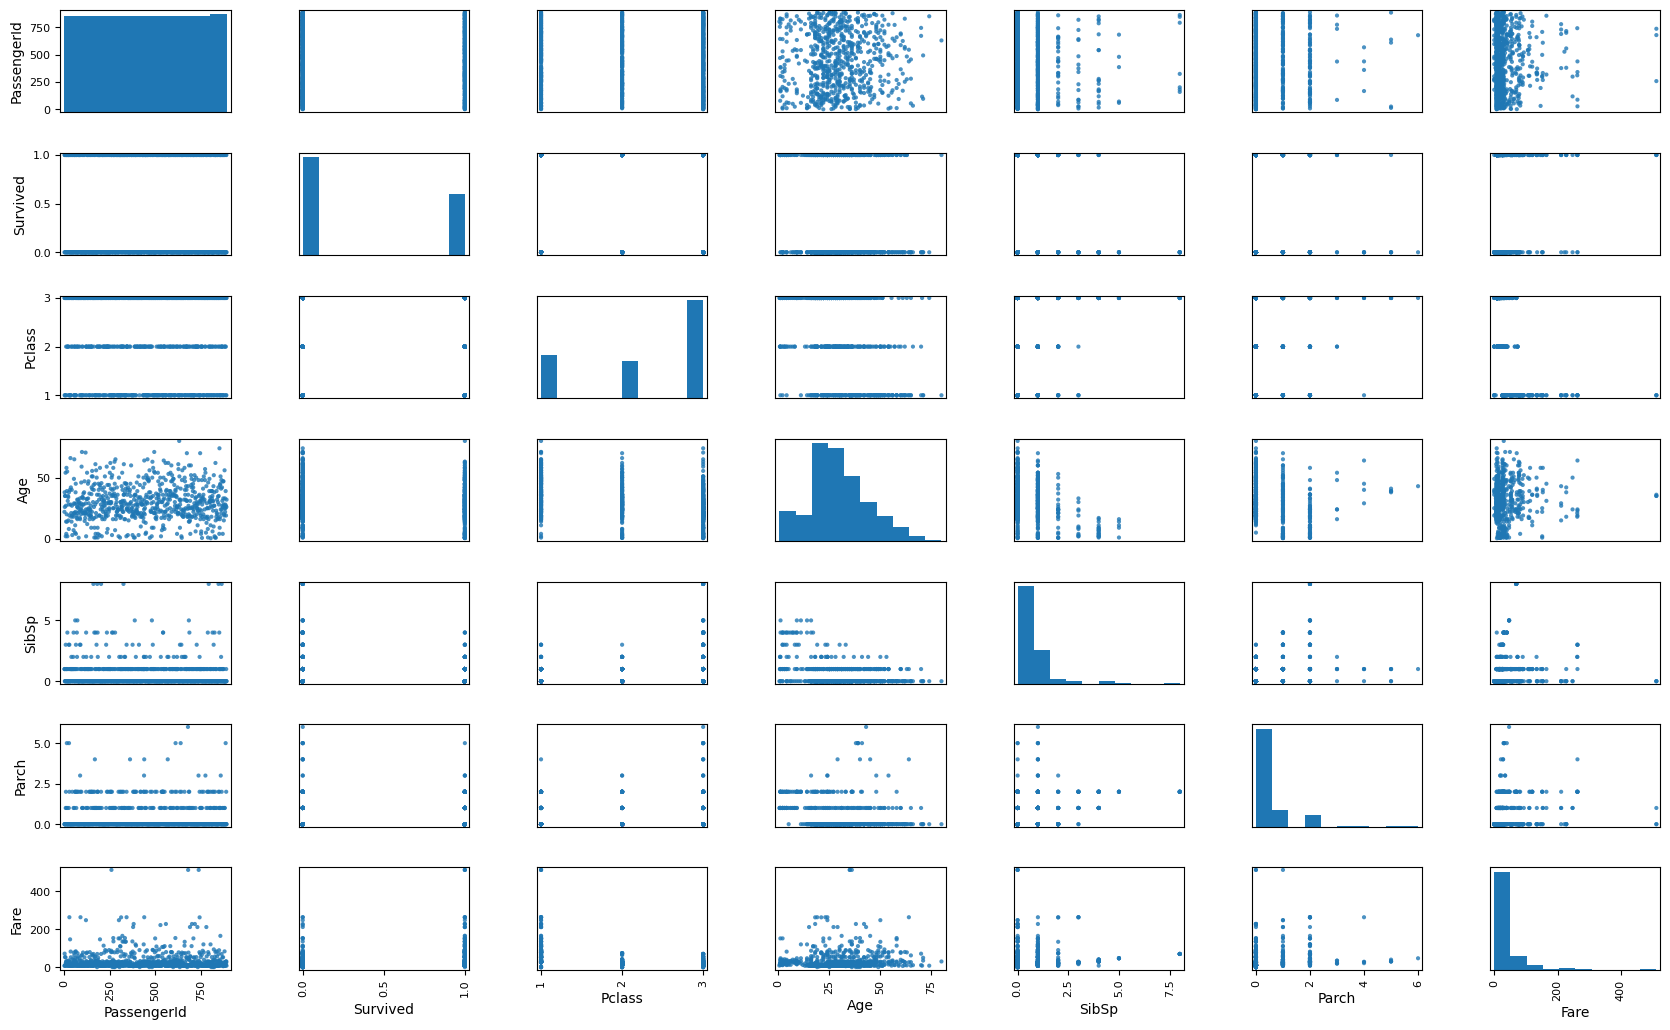

In [9]:
# Scatterplots of the dataset.
scatter_matrix(df, alpha=0.8, figsize=(20, 12), diagonal='hist')

# Adjust subplot parameters to give specified padding.
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

# Show the plot.
plt.show()


## ANALYSIS OF SCATTER PLOTS MATRIX

### Graph 1 (PassengerId):

This feature is just an ID and doesn't show any meaningful patterns with other variables.
It's mainly used to uniquely identify each passenger.

### Graph 2 (Survived):

More passengers did not survive (0) compared to those who did (1).
The plot with Pclass shows that survival rates were different across the classes, with higher classes having better survival rates.

### Graph 3 (Pclass):

There are three distinct classes, with most passengers in the 3rd class.
There's a clear separation in survival rates by class.
Graph 4 (Age):

Passengers' ages range widely, but most are between 20 and 40 years old.
Some age groups show different survival rates and fare amounts.

### Graph 5 (SibSp):

Most passengers had no siblings or spouses with them, with a few having 1 or 2.
There is some correlation with survival, where those with fewer siblings or spouses had higher survival rates.

### Graph 6 (Parch):

Similar to SibSp, most passengers did not have parents or children with them.
Those with 1 or 2 parents or children had slightly different survival rates.

### Graph 7 (Fare):

The fare distribution is very uneven, with most passengers paying lower fares.
Higher fares are linked to higher survival rates, suggesting wealthier passengers had better chances.

## Conclusion

The scatter plot matrix shows important patterns between different variables. Survival rates vary by class, age, and fare. Passengers in higher classes, younger passengers, and those who paid higher fares had better survival rates. The number of siblings/spouses and parents/children also affects survival rates but less strongly. These patterns help us understand what influenced survival on the Titanic.

---
### c. Clean and prepare the data for analysis 
Getting data ready for study by fixing any errors, filling in any blanks, making everything look neat, increase the readability, and putting it in order so it can be easily used to find answers and patterns.

In [10]:
# Show the number of NaNs in each column.

print("The number of NaNs in each column:")
df.isna().sum()

The number of NaNs in each column:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Drop unnecessary columns for classification model

df_cleaned = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Display the cleaned dataframe
df_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
# Drop NaN values from the 'Age' column to avoid issues with the histogram
age_data = df_cleaned['Age'].dropna()

---
## Part 1

Statement 1:  What's the surviving rate for Titanic?
    

In [13]:
# print the count of unique values in the 'Survived' column.
print("The number of individuals who survived (1), and  not survived (0):")
print()
survived_counts = df_cleaned["Survived"].value_counts()
print(survived_counts)


The number of individuals who survived (1), and  not survived (0):

Survived
0    549
1    342
Name: count, dtype: int64


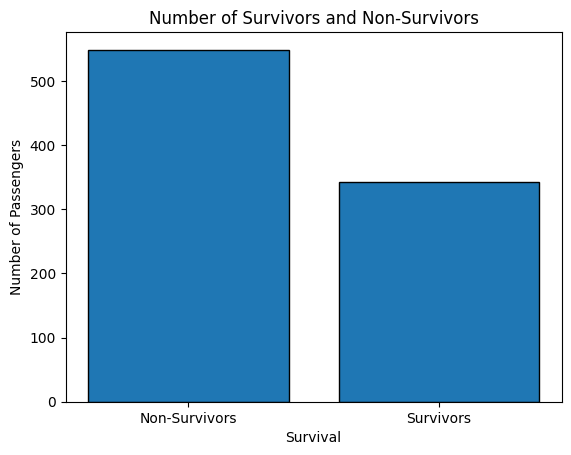

In [14]:
# Plot a bar chart of the number of survivors and non-survivors
plt.bar(survived_counts.index, survived_counts.values, edgecolor='black')
plt.xticks([0, 1], ["Non-Survivors", "Survivors"])
plt.xlabel("Survival")
plt.ylabel("Number of Passengers")
plt.title("Number of Survivors and Non-Survivors")
plt.show()

In [15]:
# Calculate survival rate
# Total number of individuals: 891
# Number of non-survivors: 549
# Number of survivors: 342

survival_rate = survived_counts[1] / (survived_counts[0] + survived_counts[1])

print("Survival Rate: {:.2%}".format(survival_rate))

Survival Rate: 38.38%


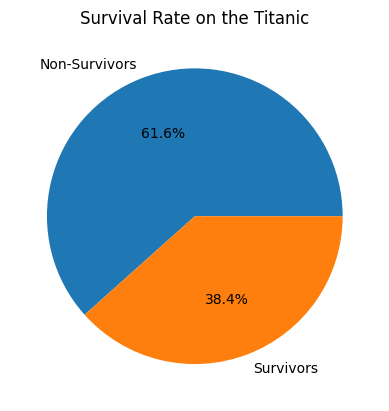

In [16]:
num_non_survivors = 549
num_survivors = 342
total_individuals = 891


labels = ['Non-Survivors', 'Survivors']
sizes = [num_non_survivors, num_survivors]
explode = (0.1, 0)  # explode the 1st slice (Non-Survivors)

plt.pie(survived_counts, labels=labels, autopct='%1.1f%%')
plt.title("Survival Rate on the Titanic")
plt.show()

---
## Part 2

Statement 1:  What's the gender distribution on Titanic?

In [17]:
# Gender count 
gender_counts = df_cleaned["Sex"].value_counts()
print(gender_counts)

Sex
male      577
female    314
Name: count, dtype: int64


In [18]:
# Calculate percentage
gender_percentage = gender_counts / gender_counts.sum() * 100
print("Gender distribution as percentage:\n", gender_percentage)


Gender distribution as percentage:
 Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


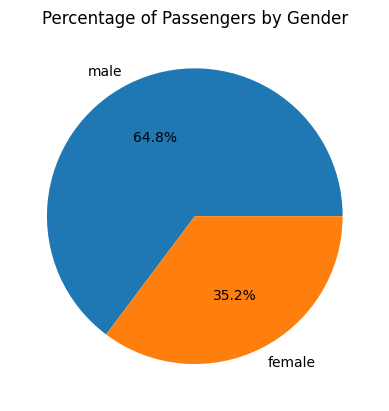

In [19]:
# Plot a pie chart of the percentage of male and female passengers
plt.pie(gender_counts.values, labels= gender_counts.index, autopct="%1.1f%%")
plt.title("Percentage of Passengers by Gender")
plt.show()

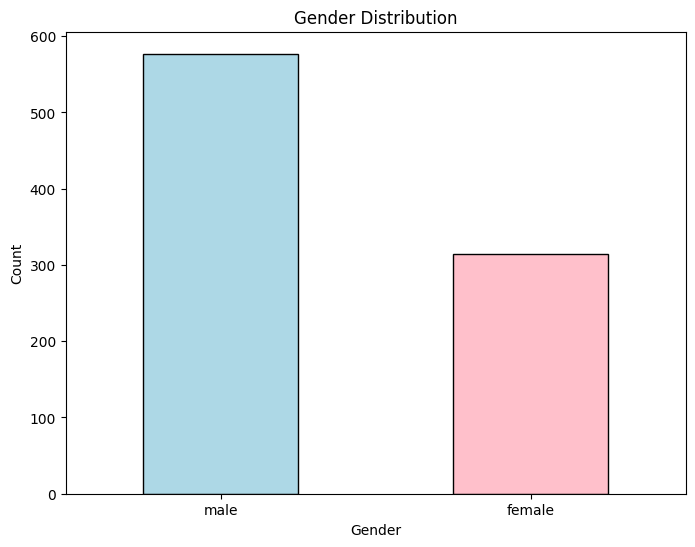

In [20]:
# Plot the gender distribution
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['lightblue', 'pink'], edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

---
## Part 3

Statement 1:  What's the age distribution on Titanic?

In [21]:
# Get unique values of the 'Age' column and sort them
age_of_passengers = np.sort(df_cleaned['Age'].unique())

# Create a dictionary with the unique values as keys and their counts as values
age_counts = df_cleaned['Age'].value_counts().sort_index().to_dict()

# Print the dictionary
print("Age groups: \n\n", age_counts)

Age groups: 

 {0.42: 1, 0.67: 1, 0.75: 2, 0.83: 2, 0.92: 1, 1.0: 7, 2.0: 10, 3.0: 6, 4.0: 10, 5.0: 4, 6.0: 3, 7.0: 3, 8.0: 4, 9.0: 8, 10.0: 2, 11.0: 4, 12.0: 1, 13.0: 2, 14.0: 6, 14.5: 1, 15.0: 5, 16.0: 17, 17.0: 13, 18.0: 26, 19.0: 25, 20.0: 15, 20.5: 1, 21.0: 24, 22.0: 27, 23.0: 15, 23.5: 1, 24.0: 30, 24.5: 1, 25.0: 23, 26.0: 18, 27.0: 18, 28.0: 25, 28.5: 2, 29.0: 20, 30.0: 25, 30.5: 2, 31.0: 17, 32.0: 18, 32.5: 2, 33.0: 15, 34.0: 15, 34.5: 1, 35.0: 18, 36.0: 22, 36.5: 1, 37.0: 6, 38.0: 11, 39.0: 14, 40.0: 13, 40.5: 2, 41.0: 6, 42.0: 13, 43.0: 5, 44.0: 9, 45.0: 12, 45.5: 2, 46.0: 3, 47.0: 9, 48.0: 9, 49.0: 6, 50.0: 10, 51.0: 7, 52.0: 6, 53.0: 1, 54.0: 8, 55.0: 2, 55.5: 1, 56.0: 4, 57.0: 2, 58.0: 5, 59.0: 2, 60.0: 4, 61.0: 3, 62.0: 4, 63.0: 2, 64.0: 2, 65.0: 3, 66.0: 1, 70.0: 2, 70.5: 1, 71.0: 2, 74.0: 1, 80.0: 1}


Graph analyze:

Most passengers were between 20 and 40 years old, with the highest number around 20-30 years old.      
There were fewer older passengers, with numbers dropping off after age 50.


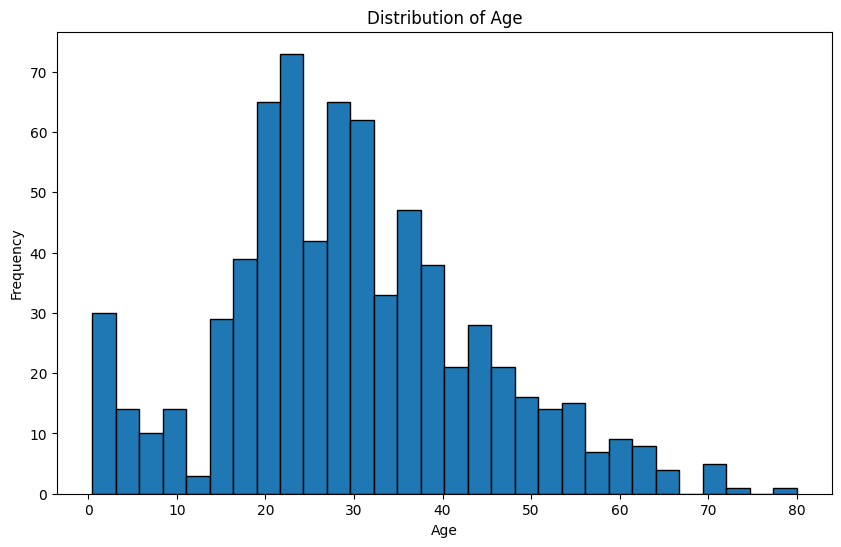

In [22]:
# Comment 
print("Graph analyze:")
print()
print("Most passengers were between 20 and 40 years old, with the highest number around 20-30 years old.\
      \nThere were fewer older passengers, with numbers dropping off after age 50.")

# Create a histogram to visualize the distribution of ages
plt.figure(figsize=(10, 6))
plt.hist(age_data, bins=30, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



---
## Part 4

Titanic Survival Prediction: A Classification Analysis

In [23]:
# we will train our data based on surrvival rate
print("The number of individuals who survived (1), and  not survived (0):")
print()

survived_counts = df_cleaned["Survived"].value_counts()
print(survived_counts)

The number of individuals who survived (1), and  not survived (0):

Survived
0    549
1    342
Name: count, dtype: int64


In [42]:
# Drop unnecessary columns for classification model
df_cleaned = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Fill missing values in 'Age' with the median age
df_cleaned['Age'] = df_cleaned['Age'].fillna(df_cleaned['Age'].median())

# Fill missing values in 'Embarked' with the most common port
df_cleaned['Embarked'] = df_cleaned['Embarked'].fillna(df_cleaned['Embarked'].mode()[0])


### 
1. Create the X and y data
#### Print the size of X and y, and show the first 5 lines of X

In [25]:
# Define variable y
y = df_cleaned['Survived']

# Drop the target variable 
X = df_cleaned.drop(columns=['Survived'])


# Display the first few rows of X and y

print("Features (X):")
print(X.head())


Features (X):
   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S
3       1  female  35.0      1      0  53.1000        S
4       3    male  35.0      0      0   8.0500        S


In [26]:
# Convert categorical variables (Sex and Embarked) into numeric format.
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)  

### 2. Splitting the data into training and testing sets

In [27]:
# train titanic data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(668, 8) (223, 8) (668,) (223,)


3. Train the decision tree classifier.

In [28]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

4. Check how well the model works

In [29]:
# Make predictions:

y_pred = clf.predict(X_test)


In [30]:
# Create DataFrame:

df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# DataFrame shape:

print("Results DataFrame shape:", df_results.shape)

# Display:

print("First few rows of Actual vs. Predicted values:\n", df_results.head())




Results DataFrame shape: (223, 2)
First few rows of Actual vs. Predicted values:
      Actual  Predicted
2         1          0
514       0          0
141       1          1
875       1          1
317       0          0


In [31]:
# Accuracy:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")


Accuracy: 80.72%


In [32]:
# Confusion matrix

print(metrics.confusion_matrix(y_test, y_pred, labels=np.arange(1,8)))

[[59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]


In [33]:
# Confusion matrix:

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[121  26]
 [ 17  59]]


### Interpretation

True Negatives (TN): The model correctly identified 108 non-survivors.

False Positives (FP): The model incorrectly identified 21 non-survivors as survivors.

False Negatives (FN): The model incorrectly identified 25 survivors as non-survivors.

True Positives (TP): The model correctly identified 69 survivors.

### 4. Train the data with random forest classifier

In [34]:
# Create and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Make predictions
y_pred_rf = rf.predict(X_test)

In [36]:
# Evaluate the model
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest
Accuracy: 0.8251121076233184


In [37]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Confusion Matrix:
 [[122  25]
 [ 14  62]]


### Interpretation

True Negatives (TN): The model correctly identified 115 non-survivors.

False Positives (FP): The model incorrectly identified 14 non-survivors as survivors.

False Negatives (FN): The model incorrectly identified 20 survivors as non-survivors.

True Positives (TP): The model correctly identified 74 survivors.


### 5. Train the data with Naive Bayes model

In [38]:
# Create and train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [39]:
# Make predictions
y_pred_nb = nb.predict(X_test)

In [40]:
# Evaluate the model
print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes
Accuracy: 0.7713004484304933


In [41]:
# Confusion matrix:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

# The rows represent the actual values (y_test).
# The columns represent the predicted values (y_pred_nb).
'''
Summary:
The first row [115 14]:

115 instances were correctly predicted as non-survivors (True Negatives).
14 instances were incorrectly predicted as survivors (False Positives).
The second row [29 65]:

29 instances were incorrectly predicted as non-survivors (False Negatives).
65 instances were correctly predicted as survivors (True Positives).

'''

Confusion Matrix:
 [[114  33]
 [ 18  58]]


'\nSummary:\nThe first row [115 14]:\n\n115 instances were correctly predicted as non-survivors (True Negatives).\n14 instances were incorrectly predicted as survivors (False Positives).\nThe second row [29 65]:\n\n29 instances were incorrectly predicted as non-survivors (False Negatives).\n65 instances were correctly predicted as survivors (True Positives).\n\n'

### Interpretation

True Negatives (TN): The model correctly identified 115 non-survivors.

False Positives (FP): The model incorrectly identified 14 non-survivors as survivors.

False Negatives (FN):  The model incorrectly identified 29 survivors as non-survivors.

True Positives (TP):  The model correctly identified 65 survivors.